In [140]:
import numpy as np
from numpy import sin, cos, exp, log, sqrt
from functools import partial
import matplotlib.pyplot as plt

In [141]:
def derivative_v1(x, f, step): # -> scalar/vector
	return (f(x + step) - f(x)) / step

def derivative_v2(x, f, step): # -> scalar/vector
	return (f(x) - f(x - step)) / step

def derivative_v3(x, f, step): # -> scalar/vector
	return (f(x + step) - f(x - step)) / (2 * step)

def derivative_v4(x, f, step): # -> scalar/vector
	return 4 / (6 * step) * (f(x + step) - f(x - step)) \
		- 1 / (12 * step) * (f(x + 2 * step) - f(x - 2 * step))

def derivative_v5(x, f, step): # -> scalar/vector
	return 3 / (4 * step) * (f(x + step) - f(x - step)) \
		- 3 / (20 * step) * (f(x + 2 * step) - f(x - 2 * step)) \
		+ 1 / (60 * step) * (f(x + 3 * step) - f(x - 3 * step))

def derivative_f(f, step, d = derivative_v5): # -> func(x)
	return partial(d, f=f, step=step)

def maxdiff(f1, f2, xrange):
  return np.amax(np.abs([f1(x) - f2(x) for x in xrange]))

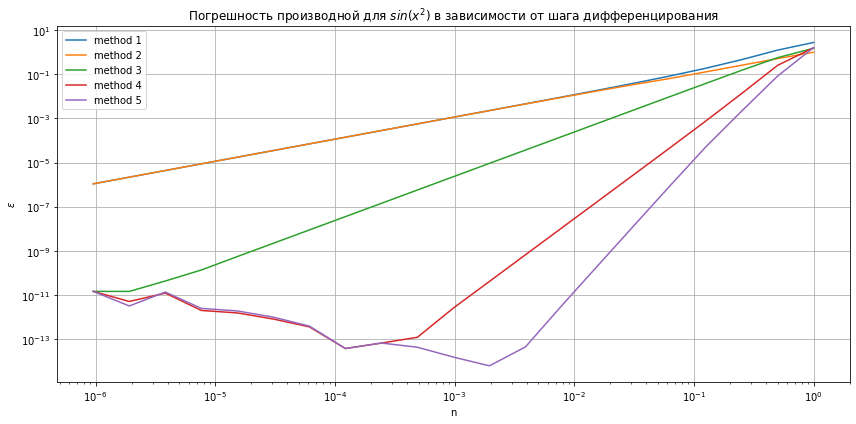

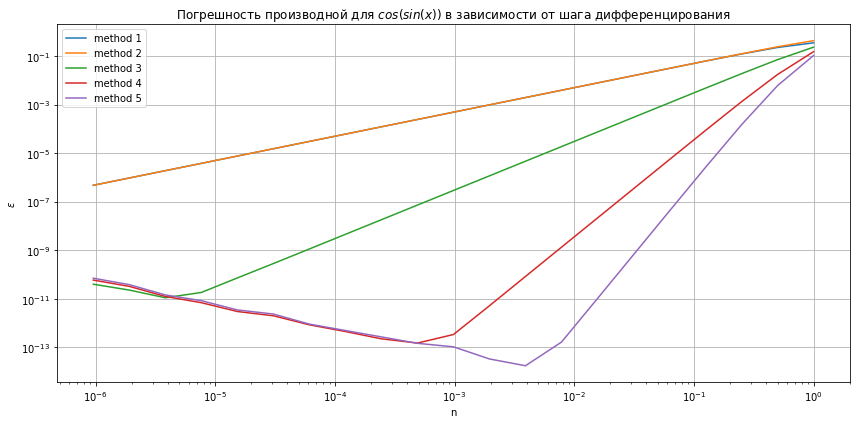

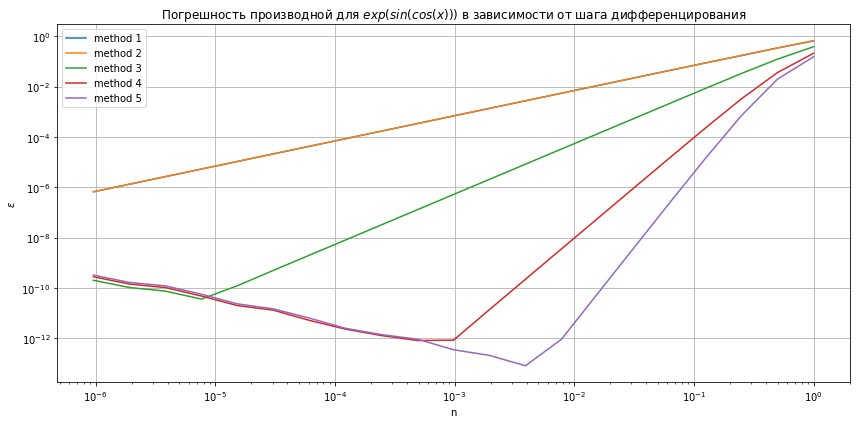

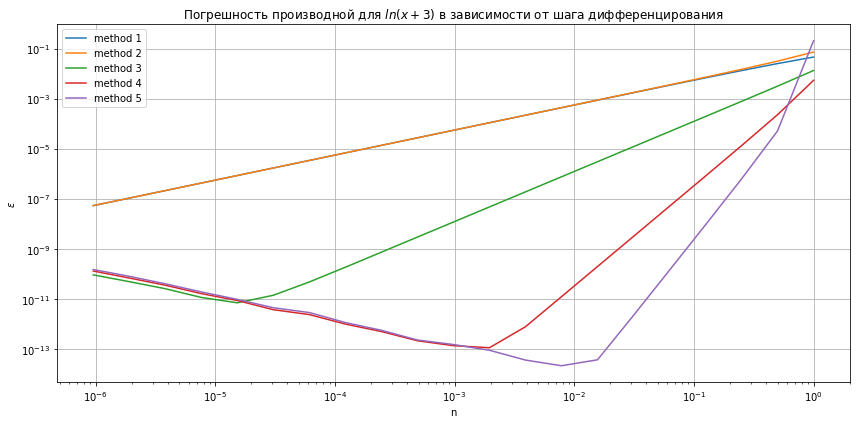

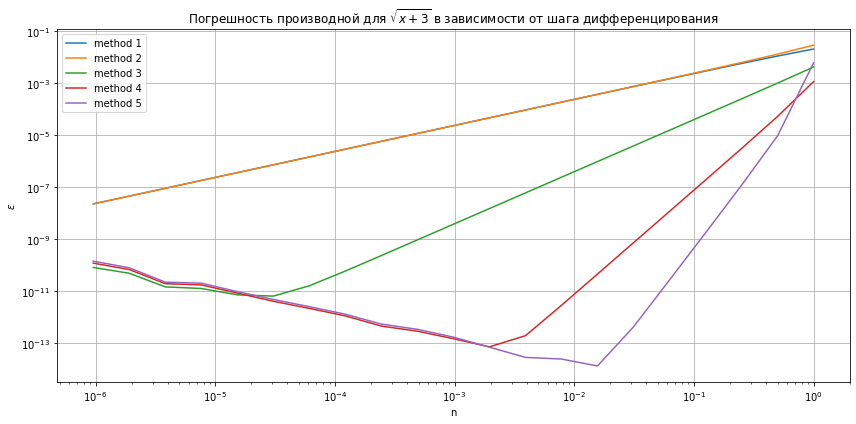

In [142]:
# list of functions to calculate derivatives
functions = [{
	"title": "sin(x^2)",
	"function": lambda x: sin(x ** 2),
  "ideal derivative": lambda x: cos(x ** 2) * 2 * x
}, {
	"title": "cos(sin(x))",
	"function": lambda x: cos(sin(x)),
  "ideal derivative": lambda x: -sin(sin(x)) * cos(x)
}, {
	"title": "exp(sin(cos(x)))",
	"function": lambda x: exp(sin(cos(x))),
  "ideal derivative": lambda x: exp(sin(cos(x))) * cos(cos(x)) * (-sin(x))
}, {
	"title": "ln(x + 3)",
	"function": lambda x: log(x + 3),
  "ideal derivative": lambda x: 1 / (x + 3)
}, {
	"title": "\sqrt{x + 3}",
	"function": lambda x: sqrt(x + 3),
  "ideal derivative": lambda x: 0.5 / sqrt(x + 3)
}]

# list of derivative calculation methods which are applied to each function above
derivative_methods = [
  derivative_v1,
  derivative_v2,
  derivative_v3,
  derivative_v4,
  derivative_v5
]

# Calculation parameters
xrange = np.linspace(-2, 2, 2000) # x range on which derivatives are compared
nrange = np.arange(1, 22) # h = 2 / (2 ** n)
hrange = np.array([2 / (2 ** n) for n in nrange])

for function in functions:
  plt.figure(figsize=[12, 6])
  plt.title("Погрешность производной для $" + function["title"] + "$ в зависимости от шага дифференцирования")
  plt.xlabel("n")
  plt.ylabel("$\epsilon$")
  plt.xticks(nrange)
  for i, method in enumerate(derivative_methods):
    maxdiff_f = lambda h: maxdiff(derivative_f(function["function"], h, method),
                                  function["ideal derivative"], hrange)
    plt.yscale("log")
    plt.loglog(hrange, [maxdiff_f(h) for h in hrange], label=("method " + str(i + 1)))

  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()